# Markov News Headline Generator

This project uses a Markov Chain model to generate short news-style headlines based on multiple public-domain style news files.  
The user can choose which files to combine, the window size, the temperature, and the length of the generated headline.  
A bar chart visualizes the top 10 most frequent words in the selected corpus.

This notebook follows the same coding style and structure used in class:
- simple procedural functions (`makerule`, `makestring`)
- minimal but meaningful comments
- clean, readable code
- frequency-based next-word selection with temperature control

## 1. Import Libraries

In [15]:
import random
import math
from collections import Counter
import matplotlib.pyplot as plt

## 2. Load Text Files

In [16]:
def load_file(path):
    with open(path, 'r', encoding='utf-8') as f:
        return f.read().split()

# File paths
file1 = 'The_Monitor_July_3_1915.txt'
file2 = 'The_Monitor_Omaha_July_10_1915.txt'
file3 = 'The_Monitor_Omaha_July_17_1915.txt'
file4 = 'The_Monitor_April_1_1916.txt'

# Load all files together
corpus = load_file(file1) + load_file(file2) + load_file(file3) + load_file(file4)
len(corpus)

8358

## 3. Create Markov Rules (makerule)

In [17]:
def makerule(words, window):
    rules = {}
    for i in range(len(words) - window):
        key = tuple(words[i:i + window])
        next_word = words[i + window]
        rules.setdefault(key, []).append(next_word)
    return rules

## 4. Generate Headline (makestring)

In [18]:
def makestring(rules, window, length, temperature):
    start = random.choice(list(rules.keys()))
    result = list(start)

    for _ in range(length):
        key = tuple(result[-window:])
        if key not in rules:
            break
        
        options = rules[key]
        freq = Counter(options).most_common()

        # Temperature-based selection
        index = math.floor((len(freq) - 1) * temperature)
        next_word = freq[index][0]

        result.append(next_word)

    return ' '.join(result)

## 5. Generate a Headline (Example Run)

In [19]:
# Generate multiple headlines (Example Run)

rules = makerule(corpus, window=3)

print("Generated Headlines:\n")

for i in range(1, 6):   # creates headlines 1 to 5
    headline = makestring(rules, window=3, length=12, temperature=0.5)
    print(f"{i}. {headline}")

Generated Headlines:

1. qualification applicable to all races alike, but it does prohibit unfair discrimination between races. The
2. If it be legitimate, clean and wholesome, it creates within him broader conception of the
3. S. Klugh, pastor of the Emmanuel Baptist church, graduated from the Scranton public school as
4. Supper. PROGRAM FOR THE WEEK. Monday Night. Musical Program rendered by First Regimental Band of
5. the same fate as did Green and his son were innocent victims of the mob.


## 6. Bar Chart Visualization

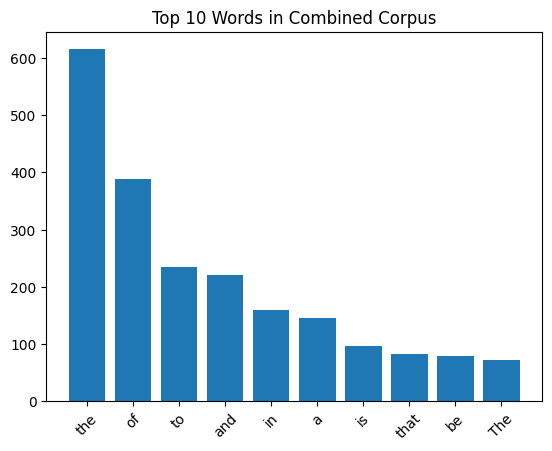

In [20]:
word_counts = Counter(corpus).most_common(10)
labels = [w for w, c in word_counts]
values = [c for w, c in word_counts]

plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title('Top 10 Words in Combined Corpus')
plt.show()